In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
import numpy as np
import matplotlib

In [2]:
df = pd.read_csv('full_data_all_runs.csv')

In [3]:
dict_model_name = {
    'nomodel' : 'Input',
    'plbart-java-cs-java': 'PLBART(C#)',
    'codet5-java-cs-java': 'CodeT5(C#)',
    'transcoder-java-cpp-java': 'TransCoder(C++)',
    'transcoder-java-python-java': 'TransCoder(Py)',
    'plbart-java-nl-java': 'PLBART(NL)',
    'codet5-java-nl-java': 'CodeT5(NL)',
    'incoder-1B': 'InCoder(1.3B)',
    'incoder-6B': 'InCoder(6.7B)',
    'santacoder': 'SantaCoder',
    'starcoderbase': 'StarCoderBase',
    'gpt-4': 'GPT-4',
    'gpt-3.5-turbo': 'GPT-3.5',
    'model': 'Model',
    'dataset': 'Dataset',
    'average': 'Average',
    'Defects4J12' : 'Defects4J v1.2',
    'Defects4J20' : 'Defects4J v2.0'
}
all_datasets= [['QuixBugs'],['HumanEvalJava'],['Defects4J12','Defects4J20']]
name_models_nl = ['plbart-java-nl-java', 'codet5-java-nl-java', 'santacoder', 'incoder-1B','incoder-6B', 'starcoderbase', 'gpt-3.5-turbo', 'gpt-4']
name_models_pl = ['plbart-java-cs-java', 'codet5-java-cs-java','transcoder-java-cpp-java', 'transcoder-java-python-java']
models_ordered_param = ['nomodel',
    'plbart-java-cs-java', 'plbart-java-nl-java',
    'codet5-java-cs-java', 'codet5-java-nl-java',
    'transcoder-java-cpp-java', 'transcoder-java-python-java', 'santacoder',
    'incoder-1B','incoder-6B', 'starcoderbase', 'gpt-3.5-turbo', 'gpt-4'
]

/tmp/ipykernel_10762/2228795456.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_filtered['model'] = df_new_filtered['model'].map(dict_model_name)
/home/falconskull/anaconda3/envs/structcoder/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


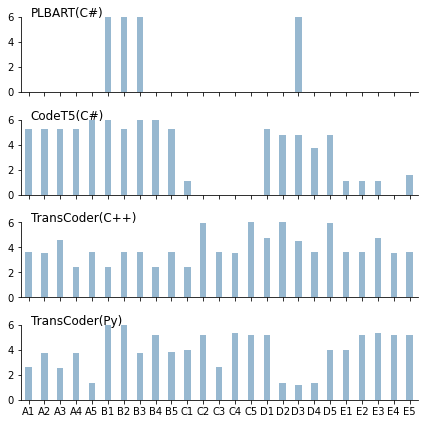

In [4]:
df_new = df.groupby(['position', 'model'])['plausability'].apply(lambda x: (x == True).sum()).reset_index(name='count_plausible')
order = models_ordered_param

df_new['model'] = pd.Categorical(df_new['model'], categories=order, ordered=True)
df_new.sort_values('model', inplace=True)

df_total = df.groupby(['model'])['plausability'].apply(lambda x: (x == True).sum()).reset_index(name='total')

df_new = df_new.merge(df_total, on=['model'])

df_new['percentage'] = df_new['count_plausible'] / df_new['total'] * 100

df_new_filtered = df_new[df_new.model.isin(name_models_pl)]
df_new_filtered['model'] = df_new_filtered['model'].map(dict_model_name)

g = sns.FacetGrid(df_new_filtered, row='model', sharey=True, sharex=True, height=1.5, aspect=4)

g.map(sns.barplot, 'position', 'percentage', color= "#8ebad9", width=0.4)

g.fig.subplots_adjust(hspace=0.1)

g.set_titles("")
new_labels= [f"{letter}{number}" for letter in 'ABCDE' for number in '12345']
g.set_xticklabels(rotation=-0, horizontalalignment = 'center', labels=new_labels)

g.set_axis_labels("", "")
g.set(ylim=(0, 6))
for ax, title in zip(g.axes.flat, g.row_names):
    ax.text(0.025, 1.05, title, transform=ax.transAxes, rotation=0, verticalalignment='center', fontsize=12)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.tight_layout()
plt.savefig("PositionPlausibleRTT_PL.pdf",bbox_inches='tight',pad_inches = 0, dpi = 800)
plt.show()


/tmp/ipykernel_10762/1043431881.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_filtered['model'] = df_new_filtered['model'].map(dict_model_name)
/home/falconskull/anaconda3/envs/structcoder/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


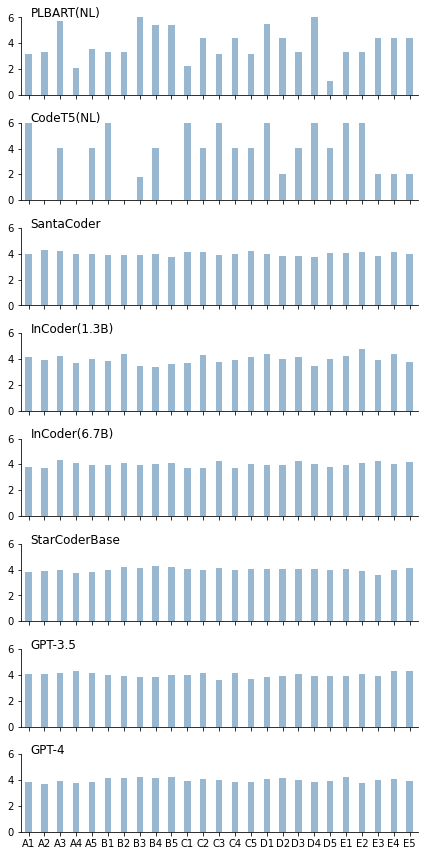

In [5]:
df_new = df.groupby(['position', 'model'])['plausability'].apply(lambda x: (x == True).sum()).reset_index(name='count_plausible')
order = models_ordered_param

df_new['model'] = pd.Categorical(df_new['model'], categories=order, ordered=True)
df_new.sort_values('model', inplace=True)

df_total = df.groupby(['model'])['plausability'].apply(lambda x: (x == True).sum()).reset_index(name='total')

df_new = df_new.merge(df_total, on=['model'])

df_new['percentage'] = df_new['count_plausible'] / df_new['total'] * 100

df_new_filtered = df_new[df_new.model.isin(name_models_nl)]
df_new_filtered['model'] = df_new_filtered['model'].map(dict_model_name)

g = sns.FacetGrid(df_new_filtered, row='model', sharey=True, sharex=True, height=1.5, aspect=4)

g.map(sns.barplot, 'position', 'percentage', color= "#8ebad9", width=0.4)

g.fig.subplots_adjust(hspace=0.1)

g.set_titles("")
new_labels= [f"{letter}{number}" for letter in 'ABCDE' for number in '12345']
g.set_xticklabels(rotation=-0, horizontalalignment = 'center', labels=new_labels)

g.set_axis_labels("", "")
g.set(ylim=(0, 6))
for ax, title in zip(g.axes.flat, g.row_names):
    ax.text(0.025, 1.05, title, transform=ax.transAxes, rotation=0, verticalalignment='center', fontsize=12)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.tight_layout()
plt.savefig("PositionPlausibleRTT_NL.pdf",bbox_inches='tight',pad_inches = 0, dpi = 800)
plt.show()


/tmp/ipykernel_10762/1545241490.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_filtered['model'] = df_new_filtered['model'].map(dict_model_name)
/home/falconskull/anaconda3/envs/structcoder/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


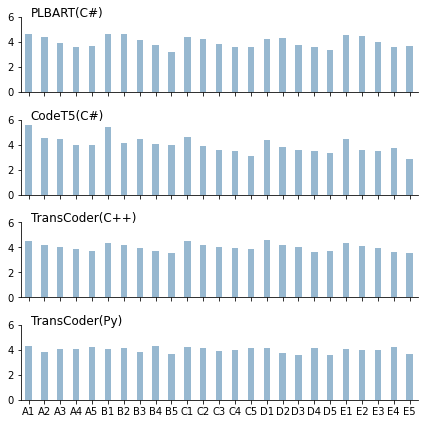

In [6]:
df_new = df.groupby(['position', 'model'])['compilable'].apply(lambda x: (x == True).sum()).reset_index(name='count_compilable')
order = models_ordered_param

df_new['model'] = pd.Categorical(df_new['model'], categories=order, ordered=True)
df_new.sort_values('model', inplace=True)

df_total = df.groupby(['model'])['compilable'].apply(lambda x: (x == True).sum()).reset_index(name='total')

df_new = df_new.merge(df_total, on=['model'])

df_new['percentage'] = df_new['count_compilable'] / df_new['total'] * 100

df_new_filtered = df_new[df_new.model.isin(name_models_pl)]
df_new_filtered['model'] = df_new_filtered['model'].map(dict_model_name)

g = sns.FacetGrid(df_new_filtered, row='model', sharey=True, sharex=True, height=1.5, aspect=4)

g.map(sns.barplot, 'position', 'percentage', color= "#8ebad9", width=0.4)

g.fig.subplots_adjust(hspace=0.1)

g.set_titles("")
new_labels= [f"{letter}{number}" for letter in 'ABCDE' for number in '12345']
g.set_xticklabels(rotation=-0, horizontalalignment = 'center', labels=new_labels)

g.set_axis_labels("", "")
g.set(ylim=(0, 6))
for ax, title in zip(g.axes.flat, g.row_names):
    ax.text(0.025, 1.05, title, transform=ax.transAxes, rotation=0, verticalalignment='center', fontsize=12)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.tight_layout()
plt.savefig("PositionCompilableRTT_PL.pdf",bbox_inches='tight',pad_inches = 0, dpi = 800)
plt.show()


/tmp/ipykernel_10762/3852415229.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_filtered['model'] = df_new_filtered['model'].map(dict_model_name)
/home/falconskull/anaconda3/envs/structcoder/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


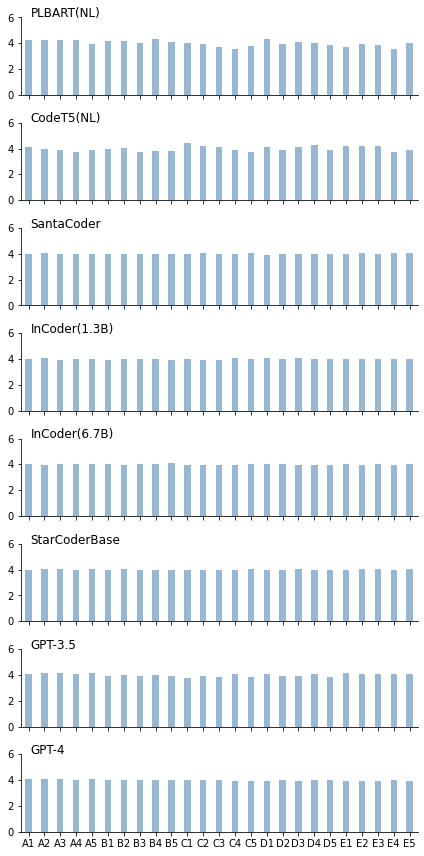

In [7]:
df_new = df.groupby(['position', 'model'])['compilable'].apply(lambda x: (x == True).sum()).reset_index(name='count_compilable')
order = models_ordered_param

df_new['model'] = pd.Categorical(df_new['model'], categories=order, ordered=True)
df_new.sort_values('model', inplace=True)

df_total = df.groupby(['model'])['compilable'].apply(lambda x: (x == True).sum()).reset_index(name='total')

df_new = df_new.merge(df_total, on=['model'])

df_new['percentage'] = df_new['count_compilable'] / df_new['total'] * 100

df_new_filtered = df_new[df_new.model.isin(name_models_nl)]
df_new_filtered['model'] = df_new_filtered['model'].map(dict_model_name)

g = sns.FacetGrid(df_new_filtered, row='model', sharey=True, sharex=True, height=1.5, aspect=4)

g.map(sns.barplot, 'position', 'percentage', color= "#8ebad9", width=0.4)

g.fig.subplots_adjust(hspace=0.1)

g.set_titles("")
new_labels= [f"{letter}{number}" for letter in 'ABCDE' for number in '12345']
g.set_xticklabels(rotation=-0, horizontalalignment = 'center', labels=new_labels)

g.set_axis_labels("", "")
g.set(ylim=(0, 6))
for ax, title in zip(g.axes.flat, g.row_names):
    ax.text(0.025, 1.05, title, transform=ax.transAxes, rotation=0, verticalalignment='center', fontsize=12)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.tight_layout()
plt.savefig("PositionCompilableRTT_NL.pdf",bbox_inches='tight',pad_inches = 0, dpi = 800)
plt.show()


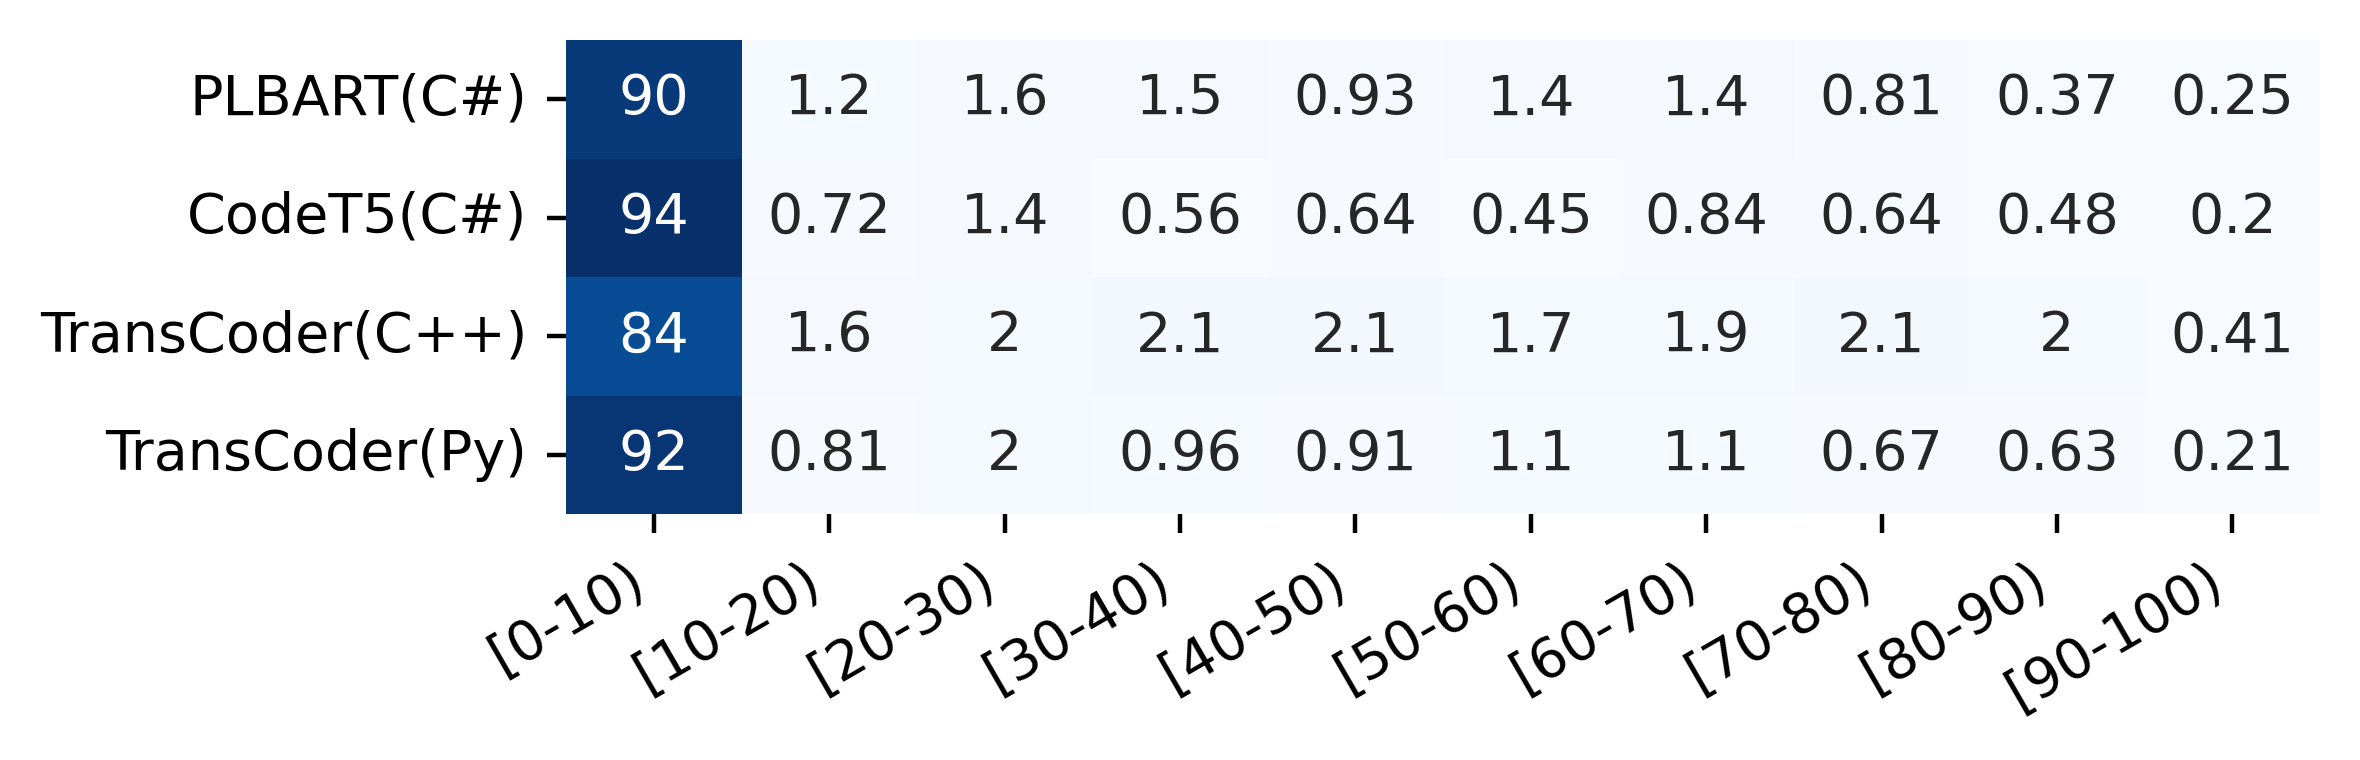

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n_bins = 10
filtered_df = df

bins = [i/n_bins for i in range(n_bins+1)]
labels = [f"[{round(i/n_bins*100)}-{round((i+1)/n_bins*100)})" for i in range(n_bins)]
filtered_df['test_passed_bin'] = pd.cut(filtered_df['test_passed'], bins=bins, labels=labels, include_lowest=True, right = False)

heatmap_data = filtered_df.groupby(['model', 'test_passed_bin']).size().reset_index(name='count')
total_counts = heatmap_data.groupby('model')['count'].sum().reset_index(name='total_count')
heatmap_data = heatmap_data.merge(total_counts, on='model')
heatmap_data['percentage'] = round((heatmap_data['count'] / heatmap_data['total_count']) * 100,2)

pivot_table = heatmap_data.pivot(index='model', columns='test_passed_bin', values='percentage')

pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.reindex(name_models_pl, axis=0)
pivot_table = pivot_table.rename(index=dict_model_name)

plt.figure(figsize=(6, len(pivot_table) * 0.5), dpi=400) # Adjust the figure size as needed
ax = sns.heatmap(pivot_table, annot=True, cmap="Blues", cbar=False)
ax.set(xlabel='',ylabel='')
plt.xticks(rotation=30,horizontalalignment='right')
plt.yticks(rotation=0)
plt.title('')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.tight_layout()

plt.savefig("HeatMapTestPassRatesPL.pdf",bbox_inches='tight',pad_inches = 0)

plt.show()


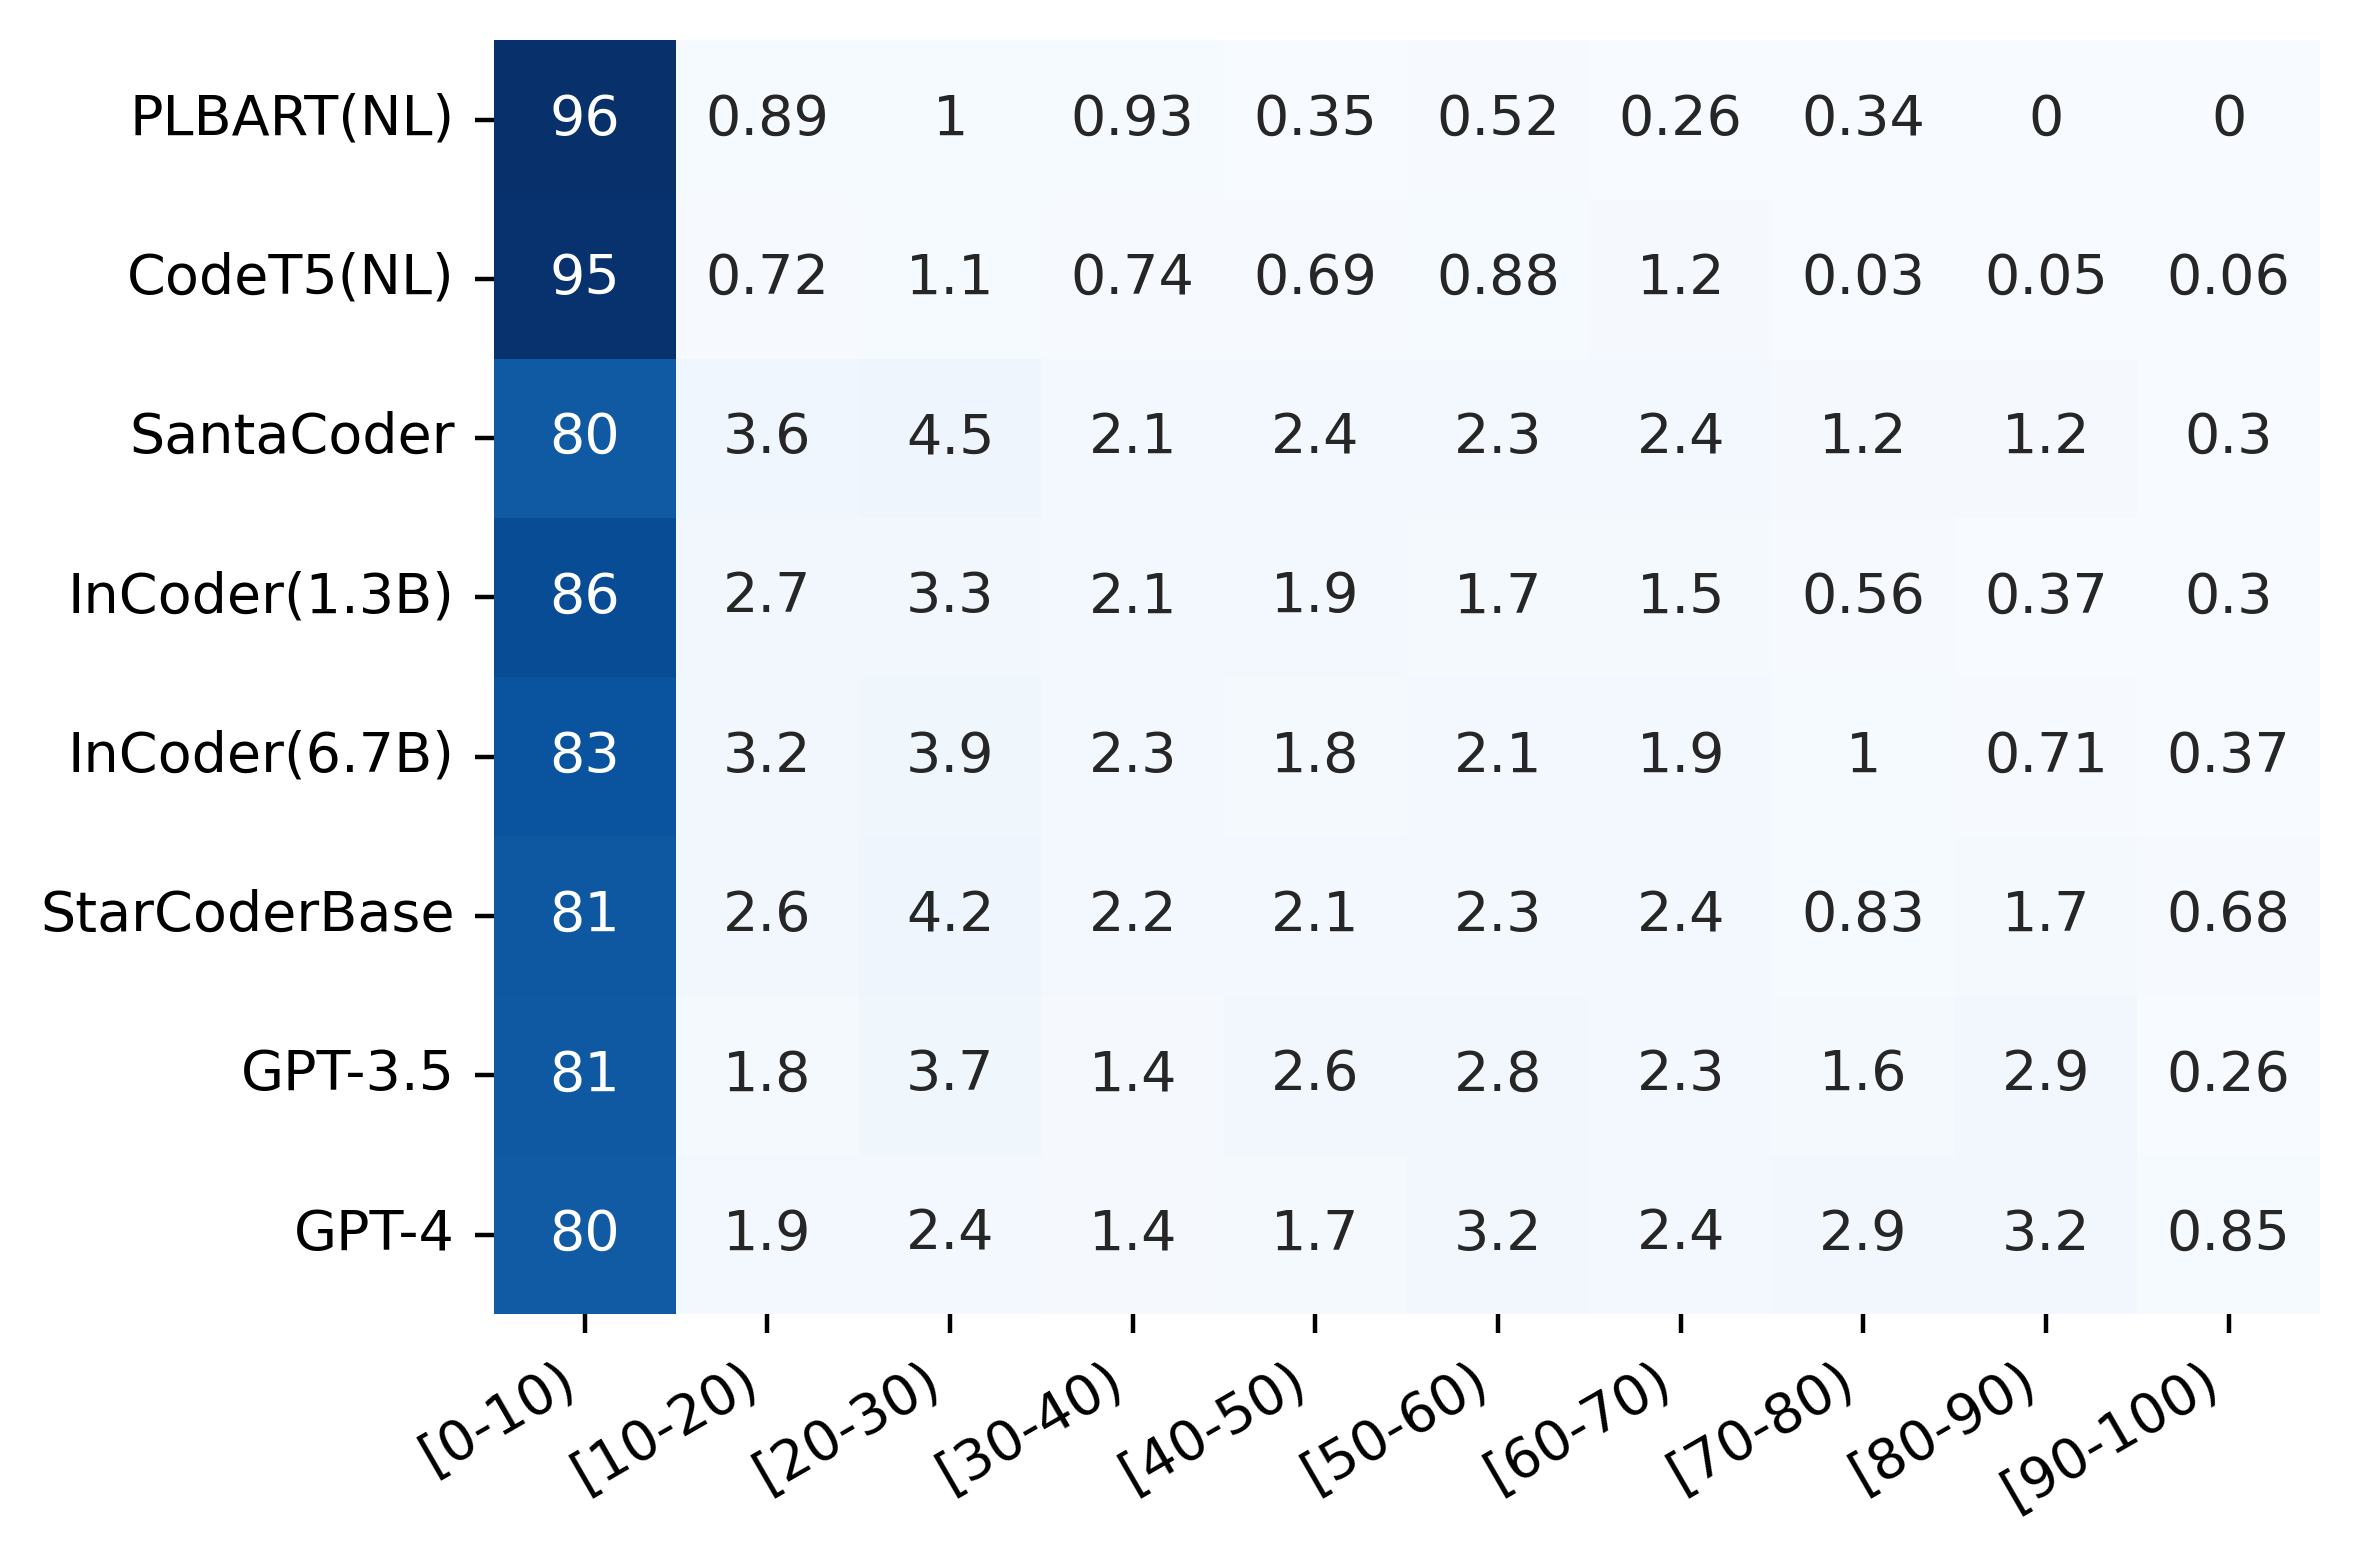

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n_bins = 10
filtered_df = df

bins = [i/n_bins for i in range(n_bins+1)]
labels = [f"[{round(i/n_bins*100)}-{round((i+1)/n_bins*100)})" for i in range(n_bins)]
filtered_df['test_passed_bin'] = pd.cut(filtered_df['test_passed'], bins=bins, labels=labels, include_lowest=True, right = False)

heatmap_data = filtered_df.groupby(['model', 'test_passed_bin']).size().reset_index(name='count')
total_counts = heatmap_data.groupby('model')['count'].sum().reset_index(name='total_count')
heatmap_data = heatmap_data.merge(total_counts, on='model')
heatmap_data['percentage'] = round((heatmap_data['count'] / heatmap_data['total_count']) * 100,2)

pivot_table = heatmap_data.pivot(index='model', columns='test_passed_bin', values='percentage')

pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.reindex(name_models_nl, axis=0)
pivot_table = pivot_table.rename(index=dict_model_name)

plt.figure(figsize=(6, len(pivot_table) * 0.5), dpi=400) # Adjust the figure size as needed
ax = sns.heatmap(pivot_table, annot=True, cmap="Blues", cbar=False)
ax.set(xlabel='',ylabel='')
plt.xticks(rotation=30,horizontalalignment='right')
plt.yticks(rotation=0)
plt.title('')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.tight_layout()

plt.savefig("HeatMapTestPassRatesNL.pdf",bbox_inches='tight',pad_inches = 0)

plt.show()


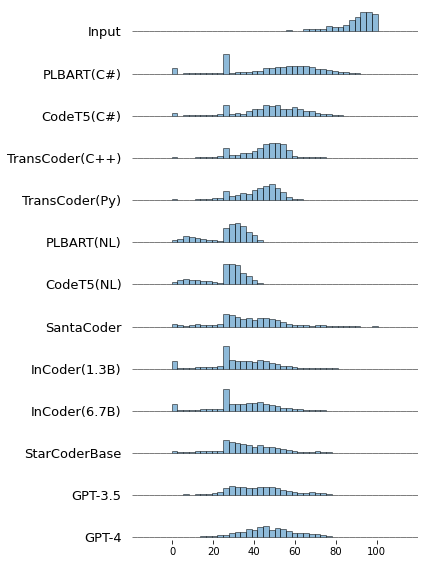

In [10]:
dataset = ['Defects4J20','Defects4J12','QuixBugs','HumanEvalJava']
model = models_ordered_param
model = ['nomodel']+name_models_pl+name_models_nl

df_filtered = df.loc[((df['dataset'].isin(dataset)) & (df['model'].isin(model)))|(df['model']=='nomodel'), :].copy()

order = model

df_filtered['model'] = pd.Categorical(df_filtered['model'], categories=order, ordered=True)
df_filtered.sort_values('model', inplace=True)

df_filtered['model'] = df_filtered['model'].map(dict_model_name)

colors = plt.cm.viridis(np.linspace(0, 1, len(order)))

fig, axes = joypy.joyplot(df_filtered, by='model', column='codebleu', figsize=(6, 8), 
                          alpha=0.5, 
                          legend=False, 
                          ylabelsize=13,
                          hist=True, overlap=0, bins = 50, density = True
                         )

plt.xlabel('')
ax = axes[-1]
ax.yaxis.set_label_position("right")
ax.yaxis.set_visible(True)
ax.yaxis.set_ticks([])
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.tight_layout()
plt.savefig("HistogramsCodeBleu.pdf",bbox_inches='tight',pad_inches = 0)

plt.show()


/tmp/ipykernel_10762/635219559.py:38: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pivot_table.to_latex())


\begin{tabular}{llllll}
\toprule
dataset &  Defects4J12 &  Defects4J20 &   QuixBugs & HumanEvalJava &     Average \\
model           &              &              &            &               &             \\
\midrule
PLBART(C\#)      &  14.26+-0.06 &   9.98+-0.05 &  16.8+-0.0 &    39.27+-0.0 &  20.1+-0.03 \\
CodeT5(C\#)      &   13.1+-0.04 &  11.33+-0.03 &  11.7+-0.0 &    26.83+-0.0 &  15.7+-0.02 \\
TransCoder(C++) &  21.42+-0.09 &  20.79+-0.05 &  47.3+-0.0 &    72.68+-0.0 &  40.5+-0.04 \\
TransCoder(Py)  &   10.2+-0.08 &   7.28+-0.13 &  41.7+-0.0 &    59.85+-0.0 &  29.8+-0.05 \\
Average         &   14.7+-0.07 &   12.3+-0.06 &  29.4+-0.0 &     49.7+-0.0 &  26.5+-0.03 \\
\bottomrule
\end{tabular}



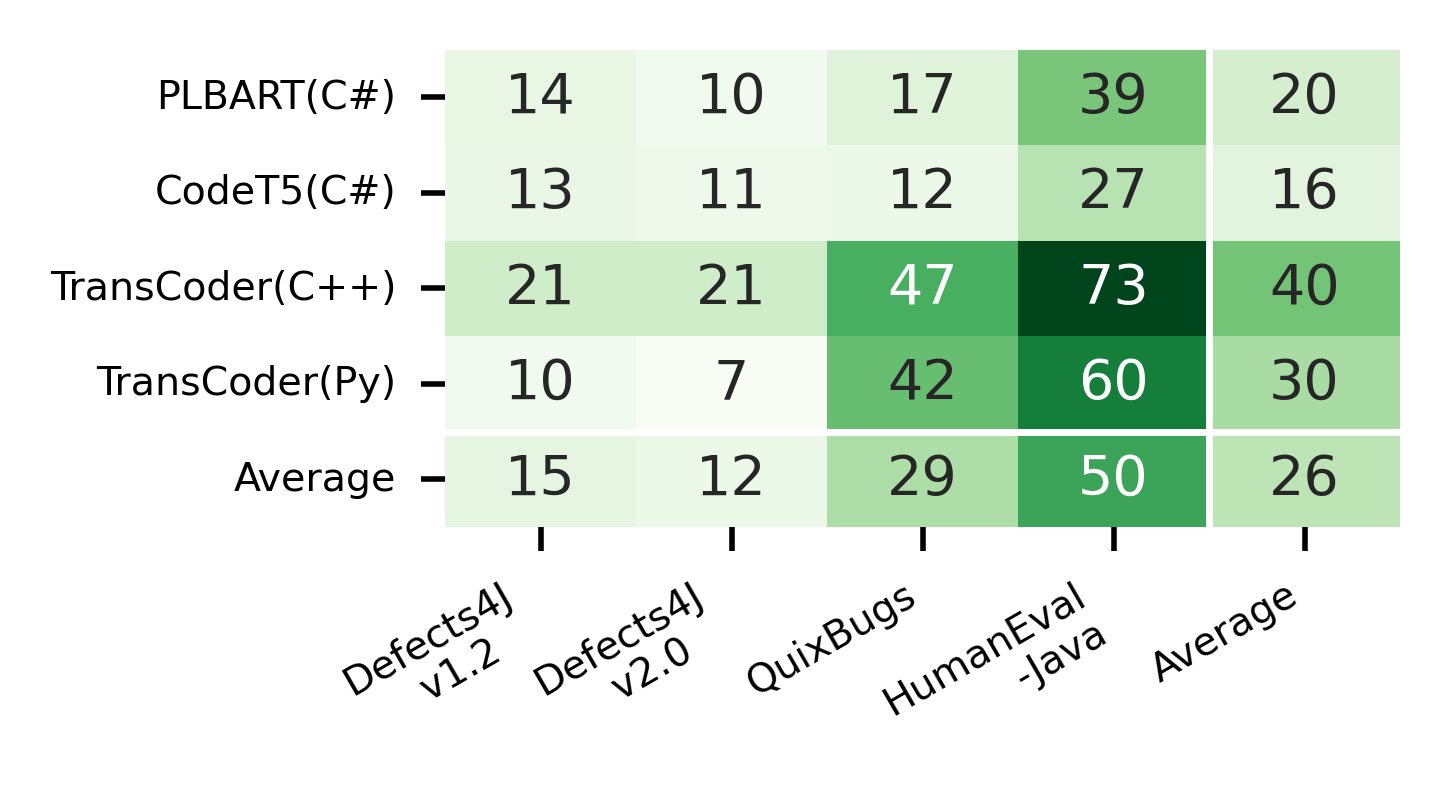

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
order_dataset = ['Defects4J12','Defects4J20','QuixBugs','HumanEvalJava', 'Average']
models_chosen =models_ordered_param[1:]
models_chosen = name_models_pl
order_models =  models_chosen+ ['Average']

df_filtered = df[df.model.isin(models_chosen)].copy()
df_filtered['is_compilable'] = df_filtered['compilable'].apply(lambda x: 1 if x else 0)

compilable_mean = df_filtered.groupby(['dataset', 'model', 'run_number'])['is_compilable'].mean().reset_index()

average_stats = compilable_mean.groupby(['dataset', 'model'])['is_compilable'].agg(['mean', 'std']).reset_index()

# Multiply by 100 to get the percentage
average_stats['mean'] = np.round(average_stats['mean'] * 100,2)
average_stats['std'] = np.round(average_stats['std'] * 100,2)

pivot_mean = average_stats.pivot(index='model', columns='dataset', values='mean')
pivot_std = average_stats.pivot(index='model', columns='dataset', values='std')

pivot_mean = pivot_mean.fillna(0)
pivot_std = pivot_std.fillna(0)

pivot_mean.loc['Average'] = np.round(pivot_mean.mean(),1)
pivot_mean['Average'] = np.round(pivot_mean.mean(axis=1),1)
pivot_std.loc['Average'] = np.round(pivot_std.mean(),2)
pivot_std['Average'] = np.round(pivot_std.mean(axis=1),2)

pivot_table = pivot_mean.astype(str) + "+-" + pivot_std.astype(str)

pivot_table = pivot_table.reindex(order_models, axis=0)
pivot_table = pivot_table.reindex(order_dataset, axis=1)

pivot_table = pivot_table.rename(index=dict_model_name)
print(pivot_table.to_latex())
pivot_mean_only = pivot_mean.astype(float)
pivot_mean_only = pivot_mean.round(0)
pivot_mean_only = pivot_mean_only.reindex(order_models, axis=0)
pivot_mean_only = pivot_mean_only.reindex(order_dataset, axis=1)
pivot_mean_only.columns = ['Defects4J\nv1.2   ', 'Defects4J\nv2.0   ', 'QuixBugs', 'HumanEval\n-Java', 'Average']
pivot_mean_only = pivot_mean_only.rename(index=dict_model_name)
plt.figure(figsize=(3, 2.8), dpi=500)
ax = sns.heatmap(pivot_mean_only, annot=True, cmap="Greens", annot_kws={"size": 8}, cbar=False)
ax.set(xlabel='',ylabel='')
ax.tick_params(axis='both', which='major', labelsize=5.7) # Increase tick label font size

plt.xticks(rotation=30,horizontalalignment='right')
plt.yticks(rotation=0)
plt.title('')
ax.axhline(y=4, color='white', lw=1)
ax.axvline(x=4, color='white', lw=1)
ax.set_box_aspect(.5)
plt.tight_layout()
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.savefig("HeatmapPercentageCompilablePL.png",bbox_inches='tight',pad_inches = 0)
plt.show()

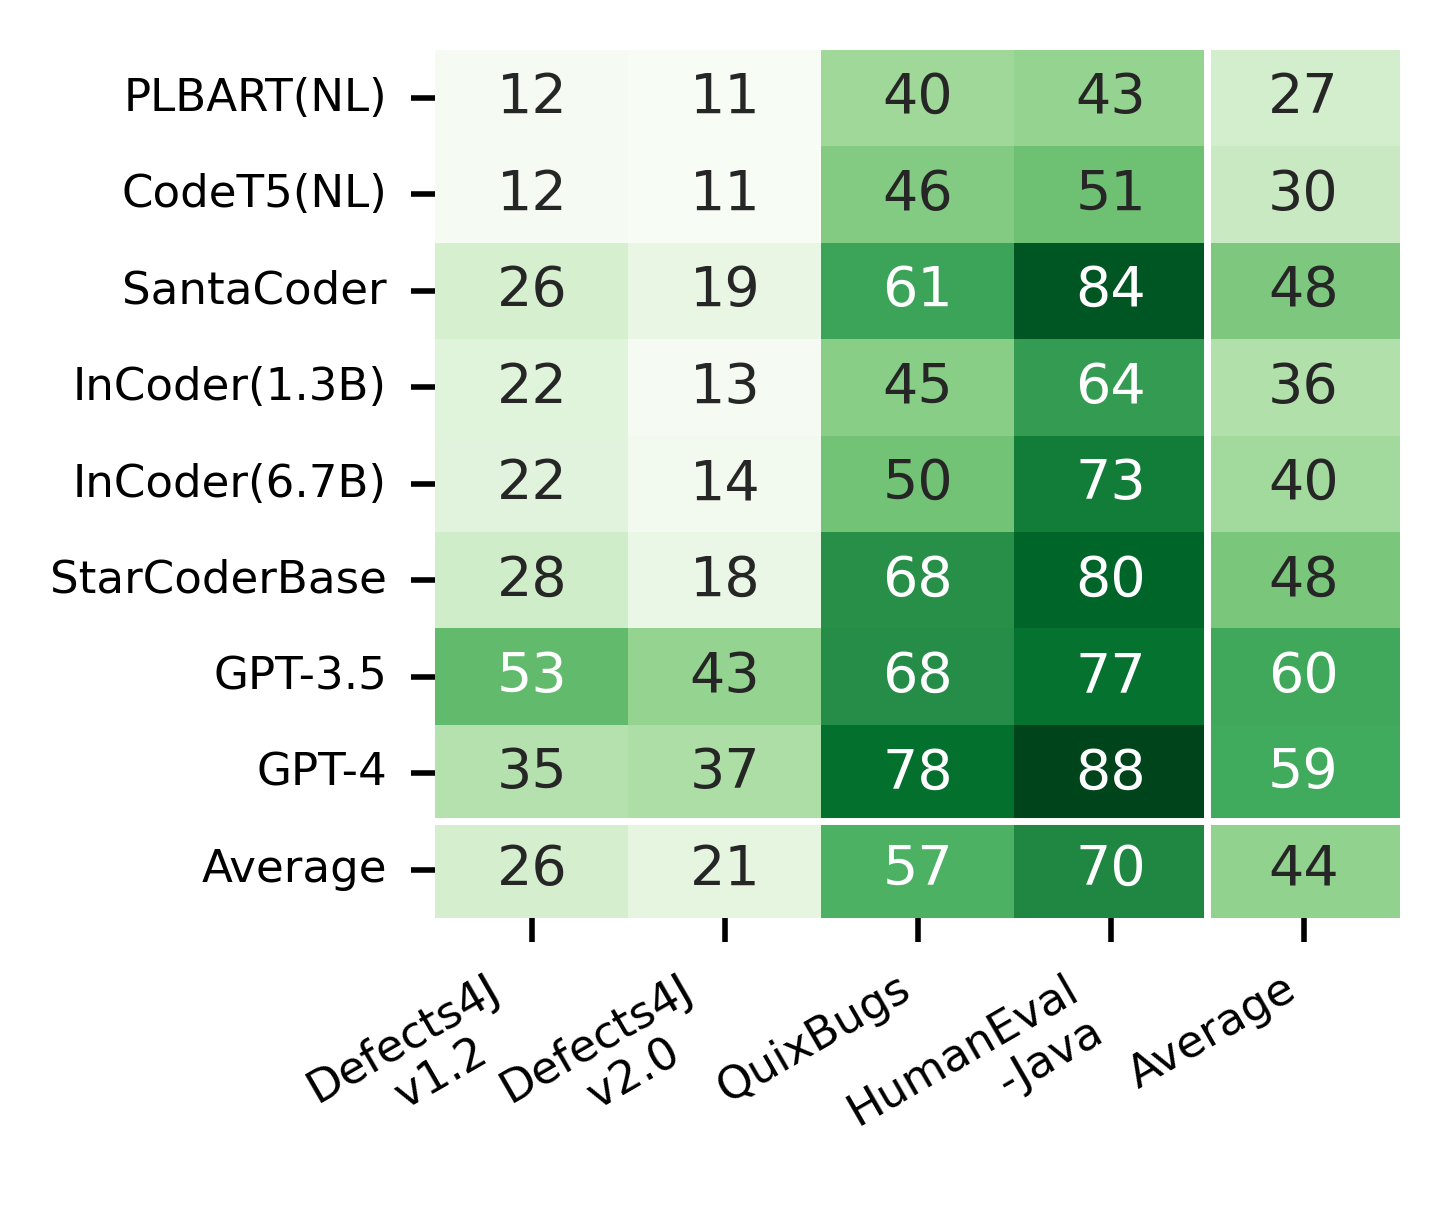

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
order_dataset = ['Defects4J12','Defects4J20','QuixBugs','HumanEvalJava', 'Average']
models_chosen = name_models_nl
order_models =  models_chosen+ ['Average']


df_filtered = df[df.model.isin(models_chosen)].copy()

df_filtered['is_compilable'] = df_filtered['compilable'].apply(lambda x: 1 if x else 0)

compilable_mean = df_filtered.groupby(['dataset', 'model', 'run_number'])['is_compilable'].mean().reset_index()

average_stats = compilable_mean.groupby(['dataset', 'model'])['is_compilable'].agg(['mean', 'std']).reset_index()

average_stats['mean'] = np.round(average_stats['mean'] * 100,2)
average_stats['std'] = np.round(average_stats['std'] * 100,2)

pivot_mean = average_stats.pivot(index='model', columns='dataset', values='mean')
pivot_std = average_stats.pivot(index='model', columns='dataset', values='std')

pivot_mean = pivot_mean.fillna(0)
pivot_std = pivot_std.fillna(0)

pivot_mean.loc['Average'] = np.round(pivot_mean.mean(),1)
pivot_mean['Average'] = np.round(pivot_mean.mean(axis=1),1)
pivot_std.loc['Average'] = np.round(pivot_std.mean(),2)
pivot_std['Average'] = np.round(pivot_std.mean(axis=1),2)

pivot_table = pivot_mean.astype(str) + "+-" + pivot_std.astype(str)

pivot_table = pivot_table.reindex(order_models, axis=0)
pivot_table = pivot_table.reindex(order_dataset, axis=1)

pivot_table = pivot_table.rename(index=dict_model_name)
pivot_mean_only = pivot_mean.astype(float)
pivot_mean_only = pivot_mean_only.reindex(order_models, axis=0)
pivot_mean_only = pivot_mean_only.reindex(order_dataset, axis=1)
pivot_mean_only.columns = ['Defects4J\nv1.2   ', 'Defects4J\nv2.0   ', 'QuixBugs', 'HumanEval\n-Java', 'Average']

pivot_mean_only = pivot_mean_only.rename(index=dict_model_name)
plt.figure(figsize=(3, 2.8), dpi=500)
ax = sns.heatmap(pivot_mean_only, annot=True, cmap="Greens", annot_kws={"size": 8}, cbar=False)
ax.set(xlabel='',ylabel='')
ax.tick_params(axis='both', which='major', labelsize=6.5) # Increase tick label font size

plt.xticks(rotation=30,horizontalalignment='right')
plt.yticks(rotation=0)
plt.title('')
plt.tight_layout()
ax.axhline(y=8, color='white', lw=1)

ax.axvline(x=4, color='white', lw=1)
ax.set_box_aspect(.9)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.tight_layout()

plt.savefig("HeatmapPercentageCompilableNL.pdf",bbox_inches='tight',pad_inches = 0)
plt.show()

In [13]:
df = pd.read_csv('data_cleaned_grouped.csv')

/tmp/ipykernel_10762/1244552660.py:1: DtypeWarning: Columns (21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_cleaned_grouped.csv')


In [14]:
## For Venn Diagram
def filter_problems(group):
    return group.loc[group['max_rate_test_passed'] == 1, 'problem'].tolist()

grouped = df.groupby(['run_number', 'dataset', 'model'])
problems = grouped.apply(filter_problems)
problems = problems.reset_index()
problems.columns = ['run_number', 'dataset', 'model', 'problems_solved']

def aggregate_problems(group):
    return list(set(group['problems_solved'].sum()))

grouped_problems = problems.groupby(['dataset', 'model'])
aggregated_problems = grouped_problems.apply(aggregate_problems)
aggregated_problems = aggregated_problems.reset_index()
aggregated_problems.columns = ['dataset', 'model', 'problems_solved']

/home/falconskull/anaconda3/envs/structcoder/lib/python3.9/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/falconskull/anaconda3/envs/structcoder/lib/python3.9/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn5()` is retained for backwards compatibility; use `venn()` instead
  warn((


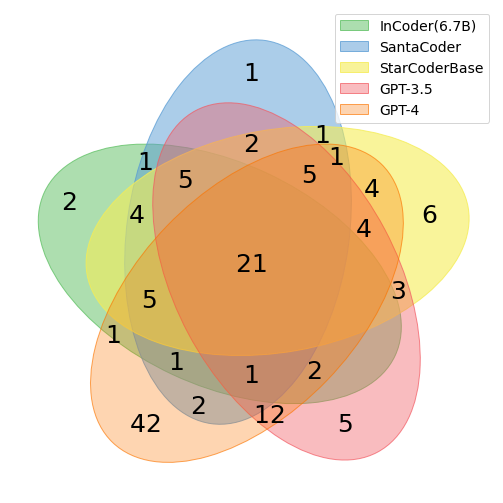

In [15]:
from upsetplot import UpSet
import pandas as pd
import venn
from matplotlib import pyplot as plt

# Select dataset
# dataset = ['HumanEvalJava', 'QuixBugs','Defects4J12', 'Defects4J20']
dataset = ['HumanEvalJava']  # Replace with your dataset
# dataset = ['QuixBugs']  # Replace with your dataset
# dataset = ['Defects4J12', 'Defects4J20']  # Replace with your dataset

# Select five models
models = ['incoder-6B','santacoder', 'starcoderbase',  'gpt-3.5-turbo', 'gpt-4']  # Replace with your models

df_chosen = aggregated_problems.copy()
# df_chosen = common_aggregated_problems.copy()
df_chosen.loc[df_chosen['dataset'].isin(dataset), 'dataset'] = dataset[0]
df_chosen = df_chosen.groupby(['dataset', 'model'])['problems_solved'].agg(sum).reset_index()

# Prepare a dictionary to store problem sets for each model
problem_sets = {}

# Extract problem sets for each model and store them in the dictionary
for model in models:
    df_model = df_chosen.loc[(df_chosen['dataset'].isin(dataset)) & (df_chosen['model'] == model), 'problems_solved']
    if not df_model.empty:
        problem_sets[model] = set(df_model.values[0])

# Draw Venn diagram
labels = venn.get_labels([set(val) for val in problem_sets.values()], fill=['number'])
for x in labels:
    if labels[x] == '0 ':
        labels[x]=''
    
fig, ax = venn.venn6(labels, names=[*map(dict_model_name.get,list(problem_sets.keys()))], fontsize=14)

# Bold the label(s) with the highest number
f = True
for text in ax.texts:
    if text.get_text() == '8 ':
        if f:
            f= not f
            text.set_weight('bold')

    text.set_fontsize(25)

# plt.legend()
# plt.savefig("VennDefects4j.pdf")
plt.savefig("VennDefects4J_NoLeg.pdf",bbox_inches='tight',pad_inches = 0)


plt.show()